<a href="https://colab.research.google.com/github/subhadeep-2004/Cyber_Text_Detection/blob/main/Cyber_detect_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyber Bullying Detection
<div style="">
  <img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExaDR1aWJ3OWZhdXZ0MzdvNWx0NnZta3BvZTloY2lsNzBjaWc1MjFpbSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/4z7Z1WeRCksA4MH8Om/giphy.gif" width="300">
</div>

In [ ]:
! pip install textattack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.7/445.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding, GlobalMaxPooling1D, Conv1D, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

from textattack.augmentation import WordNetAugmenter

from sklearn.metrics import classification_report, f1_score

nltk.download('punkt_tab')
import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english'))
stop_words = [i for i in stop_words if i not in ['not','until','against','up', 'down', 'no', 'nor',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                                                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
                                                 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't"]]

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root

In [ ]:
df = pd.read_csv("dataset.csv")
df=df.sample(frac=1)
df=df.head(10000)
df.head()

,Unnamed: 0,content,label
11025,11025,Hate to date me; but my kids had the Big Whee...,0
17287,17287,corona lights :D,0
6280,6280,ohh everytime I see that nasty ass husband wa...,1
6208,6208,dude fucking seriously you watched hella no...,1
18368,18368,Are you a lonely boy?,0


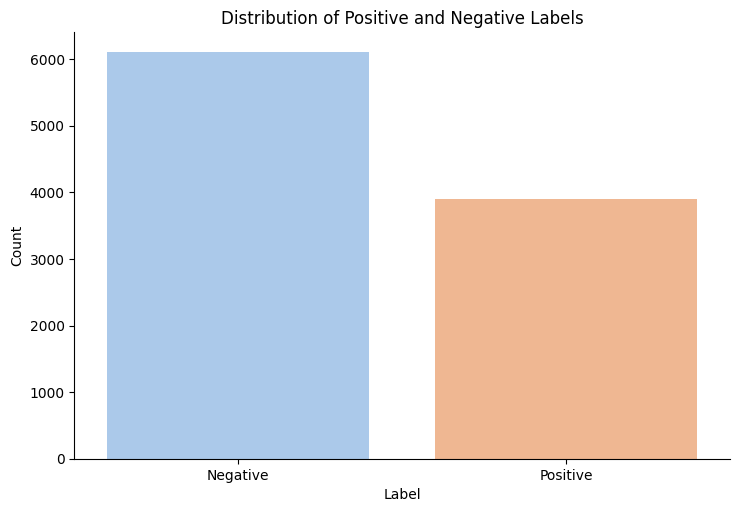

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['label_name'] = df['label'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
sns.catplot(x='label_name', kind='count', data=df, height=5, aspect=1.5, palette='pastel')
plt.title('Distribution of Positive and Negative Labels')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

# FEATURE ENGINEERING

In [ ]:
def get_word_len(content):
    return len(content.split(' '))

def get_char_len(content):
    return len(content)

def preprocess_data(content):
    content = content.lower()
    content = re.sub(r"http\S+|www\S+|https\S+", '', content, flags=re.MULTILINE)  # Remove links
    content = re.sub(r'@\w+', '', content)  # Remove mentions
    content = re.sub(r'[^a-zA-Z\s]', '', content)  # Keep only letters and spaces
    tokens = [token.lemma_ for token in nlp(content) if token not in stop_words and len(token) > 1]
    return " ".join(tokens)

# Apply preprocessing
df["clean_content"] = df["content"].apply(preprocess_data)
df["content_word_len"] = df["clean_content"].apply(get_word_len)
df["content_char_len"] = df["clean_content"].apply(get_char_len)

# Normalization of numerical values
scaler = MinMaxScaler()
numerical_cols = ["content_word_len", "content_char_len"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display processed data
df.head()

,Unnamed: 0,content,label,label_name,clean_content,content_word_len,content_char_len
11025,11025,Hate to date me; but my kids had the Big Whee...,0,Negative,hate to date I but my kid have the big wheel a...,0.077381,0.072704
17287,17287,corona lights :D,0,Negative,corona light,0.011905,0.009566
6280,6280,ohh everytime I see that nasty ass husband wa...,1,Positive,ohh everytime see that nasty ass husband want ...,0.041667,0.046556
6208,6208,dude fucking seriously you watched hella no...,1,Positive,dude fucking seriously you watch hella now pay...,0.047619,0.056122
18368,18368,Are you a lonely boy?,0,Negative,be you lonely boy,0.017857,0.012755


In [ ]:
# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df["clean_content"])

# Define the target variable
y = df["label"]

# Use the Chi-Square test to select the top 1000 text features
chi2_selector = SelectKBest(chi2, k=1000)
X_text_selected = chi2_selector.fit_transform(X_text, y)
print(f"TF-IDF feature matrix shape: {X_text.shape} -> After selection: {X_text_selected.shape}")

# Convert normalized numerical features into a sparse matrix
X_numeric = df[numerical_cols].values
X_numeric_sparse = csr_matrix(X_numeric)
# Combine both feature sets horizontally
X_final = hstack([X_text_selected, X_numeric_sparse])

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


TF-IDF feature matrix shape: (10000, 5000) -> After selection: (10000, 1000)


**MLP**

---



Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6080 - loss: 0.6698 - val_accuracy: 0.7405 - val_loss: 0.5300
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7641 - loss: 0.5030 - val_accuracy: 0.7885 - val_loss: 0.4438
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8110 - loss: 0.4178 - val_accuracy: 0.7930 - val_loss: 0.4310
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8187 - loss: 0.3948 - val_accuracy: 0.8020 - val_loss: 0.4224
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8314 - loss: 0.3644 - val_accuracy: 0.7925 - val_loss: 0.4298
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8411 - loss: 0.3524 - val_accuracy: 0.8020 - val_loss: 0.4309
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8561 - loss: 0.3177 - val_accuracy: 0.8035 - val_loss: 0.4459
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8635 - loss: 0.3082 - val_accuracy: 0

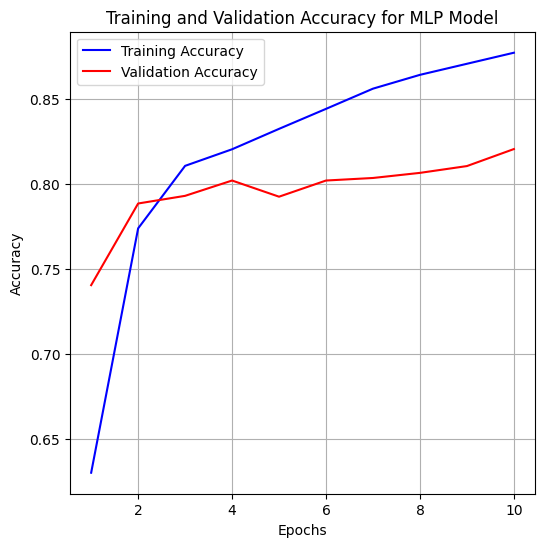

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1200
           1       0.82      0.70      0.76       800

    accuracy                           0.82      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.82      0.82      0.82      2000

F1 Score Overall: 0.7586


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, f1_score


# Convert labels to categorical (for softmax output)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Convert sparse matrix to dense format
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Define and compile MLP model
mlp_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_dense.shape[1],)),
    Dropout(0.25),
    Dense(64, activation="relu"),
    Dropout(0.25),
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax")
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

# Train the model
history = mlp_model.fit(X_train_dense, y_train_categorical,
                        epochs=10, batch_size=64,
                        validation_data=(X_test_dense, y_test_categorical),
                        verbose=1)

from sklearn.metrics import classification_report
y_pred_mlp = mlp_model.predict(X_test_dense).argmax(axis=1)
print("MLP Model Performance:\n", classification_report(y_test, y_pred_mlp))


import matplotlib.pyplot as plt

# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for MLP Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()


y_pred_probs = mlp_model.predict(X_test)

# Convert to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


f1_mlp = f1_score(y_true, y_pred, average='binary')
print(f"F1 Score Overall: {f1_mlp:.4f}")

**Random Forest**

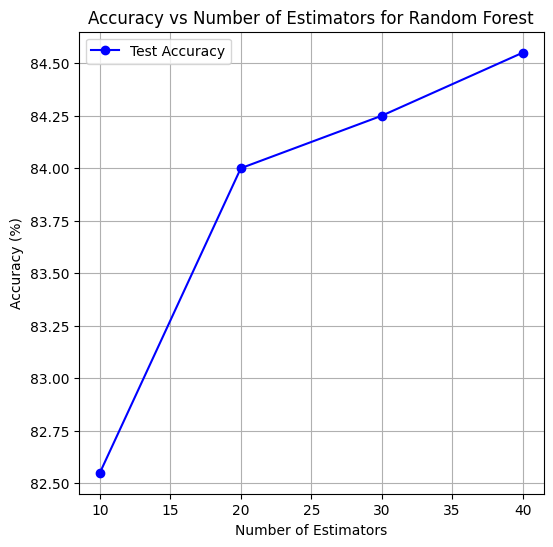

Accuracy: 84.55
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1200
           1       0.84      0.76      0.80       800

    accuracy                           0.85      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.85      0.85      0.84      2000

F1 Score Overall: 0.8441


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


# Text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_content"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)


import matplotlib.pyplot as plt

# for different n_estimators
# as no epoch in rf so cant take that approach to get the graph
n_estimators = [10, 20, 30, 40]
accuracies = []

for n in n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy * 100)

# Plot the accuracy
plt.figure(figsize=(6, 6))
plt.plot(n_estimators, accuracies, marker='o', linestyle='-', color='blue', label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Number of Estimators for Random Forest')
plt.legend(loc='best')
plt.grid(True)

# Add text annotation
# plt.text(n_estimators[-1] - 20, accuracies[-1] - 1, 'Graph for Random Forest', fontsize=12, color='purple')

plt.show()



# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

f1_rf = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score Overall: {f1_rf:.4f}")


**LSTM**

---



Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.6131 - loss: 0.6713 - val_accuracy: 0.6000 - val_loss: 0.6732
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.6153 - loss: 0.6687 - val_accuracy: 0.6000 - val_loss: 0.6731
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - accuracy: 0.6137 - loss: 0.6697 - val_accuracy: 0.6000 - val_loss: 0.6731
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.6090 - loss: 0.6710 - val_accuracy: 0.6000 - val_loss: 0.6738
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.6134 - loss: 0.6691 - val_accuracy: 0.6000 - val_loss: 0.6734
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.6143 - loss: 0.6670 - val_accuracy: 0.6000 - val_loss: 0.6742
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.6121 - loss: 0.6706 - val_accuracy: 0.6000 - val_loss: 0.6736
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.6040 - loss: 0

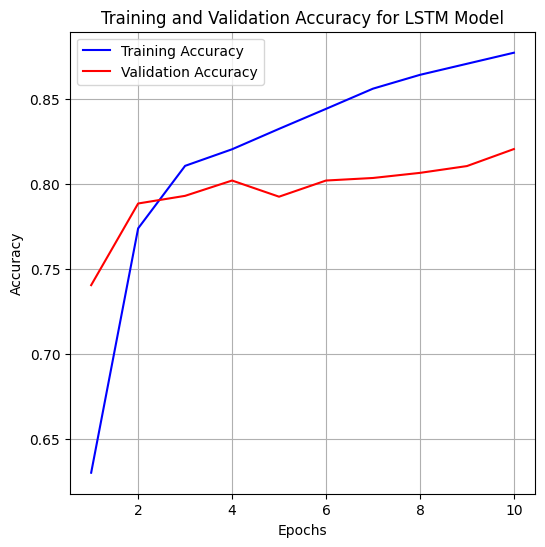

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5755 - loss: 0.6840
Test Accuracy: 60.00%
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75      1200
           1       0.00      0.00      0.00       800

    accuracy                           0.60      2000
   macro avg       0.30      0.50      0.38      2000
weighted avg       0.36      0.60      0.45      2000

F1 Score Overall: 0.4500


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Parameters
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

# Tokenization
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_content"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["clean_content"])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Labels
labels = df["label"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for LSTM Model')
plt.legend(loc='best')
plt.grid(True)

# Add text annotation

plt.show()


# Evaluate the model on the test set

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate weighted F1 score
f1_lstm = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score Overall: {f1_lstm:.4f}")

**GRU**

---



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

# Parameters
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

# Tokenization
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_content"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["clean_content"])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Labels
labels = df["label"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define GRU model
model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    #Embedding(input_dim=5000, output_dim=128, input_length=100),
    GRU(128, return_sequences=True),
    Dropout(0.5),
    GRU(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate weighted F1 score
f1_gru = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1_gru:.4f}")

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 363ms/step - accuracy: 0.6036 - loss: 0.6737 - val_accuracy: 0.6000 - val_loss: 0.6731
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 360ms/step - accuracy: 0.6140 - loss: 0.6694 - val_accuracy: 0.6000 - val_loss: 0.6734
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 349ms/step - accuracy: 0.6050 - loss: 0.6727 - val_accuracy: 0.6000 - val_loss: 0.6738
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 367ms/step - accuracy: 0.6138 - loss: 0.6683 - val_accuracy: 0.6000 - val_loss: 0.6731
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 375ms/step - accuracy: 0.6115 - loss: 0.6701 - val_accuracy: 0.6000 - val_loss: 0.6755
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 348ms/step - accuracy: 0.6009 - loss: 0.6748 - val_accuracy: 0.6000 - val_loss: 0.6730
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.6133 - loss: 0.6693 - val_accuracy: 0.6000 - val_loss: 0.6731
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 366ms/step - accuracy: 0.6112 - loss: 0

**CONVOLUTION**

---



Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.6022 - loss: 0.6704 - val_accuracy: 0.6915 - val_loss: 0.5808
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.7585 - loss: 0.5100 - val_accuracy: 0.7705 - val_loss: 0.4703
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.8698 - loss: 0.3226 - val_accuracy: 0.7960 - val_loss: 0.4682
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.9386 - loss: 0.1822 - val_accuracy: 0.8090 - val_loss: 0.5138
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9705 - loss: 0.0987 - val_accuracy: 0.8065 - val_loss: 0.5843
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9812 - loss: 0.0640 - val_accuracy: 0.8200 - val_loss: 0.6876
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.7920 - val_loss: 0.7712
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9876 - loss: 0.0359 - val

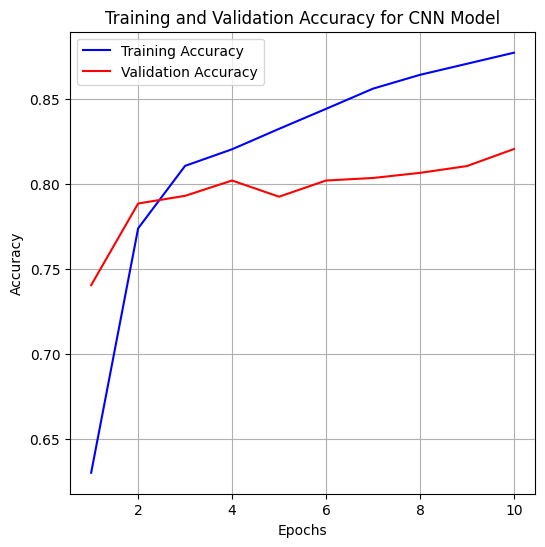

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1200
           1       0.70      0.81      0.75       800

    accuracy                           0.78      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.80      0.78      0.79      2000

Weighted F1 Score: 0.7864


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, SpatialDropout1D
from sklearn.model_selection import train_test_split

# Parameters
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

# Tokenization
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_content"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["clean_content"])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Labels
labels = df["label"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build Convolutional model
model = Sequential([
    Input(shape=(100,)),
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    SpatialDropout1D(0.2),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



import matplotlib.pyplot as plt

# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for CNN Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()





y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate Weighted F1 Score
f1_conv = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1_conv:.4f}")







**BIDIRECTIONAL+LSTM**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 346ms/step - accuracy: 0.6019 - loss: 0.6668 - val_accuracy: 0.6988 - val_loss: 0.5546
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 336ms/step - accuracy: 0.7766 - loss: 0.4888 - val_accuracy: 0.7144 - val_loss: 0.5596
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 353ms/step - accuracy: 0.8454 - loss: 0.3710 - val_accuracy: 0.7444 - val_loss: 0.5800
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 343ms/step - accuracy: 0.9135 - loss: 0.2406 - val_accuracy: 0.7469 - val_loss: 0.6356
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 372ms/step - accuracy: 0.9451 - loss: 0.1628 - val_accuracy: 0.7531 - val_loss: 0.7286
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 342ms/step - accuracy: 0.9577 - loss: 0.1215 - val_accuracy: 0.7506 - val_loss: 0.7490
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.9696 - loss: 0.1024 - val_accuracy: 0.7581 - val_loss: 0.9104
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.9743 - loss: 0

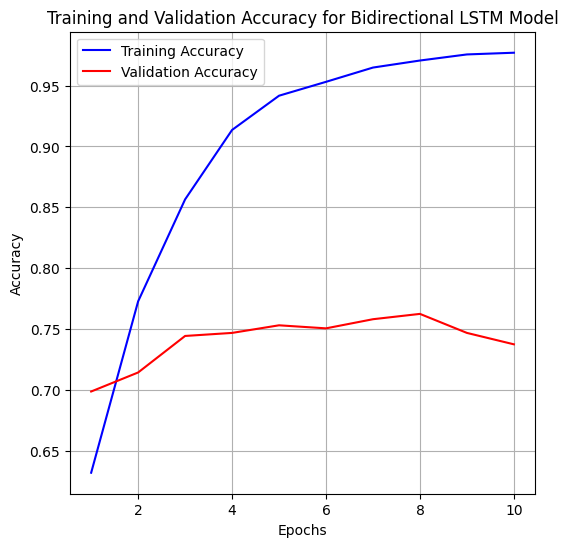

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      1200
           1       0.66      0.80      0.72       800

    accuracy                           0.75      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.77      0.75      0.75      2000

Weighted F1 Score: 0.7544


In [ ]:
import tensorflow as tf
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from tqdm import tqdm

# Load Spacy model and stopwords
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_data(content):
    content = content.lower()
    content = re.sub(r"http\S+|www\S+|https\S+", '', content)  # Remove links
    content = re.sub(r'@\w+', '', content)  # Remove mentions
    content = re.sub(r'[^\w\s#]', '', content)  # Remove special characters
    tokens = [token.lemma_ for token in nlp(content) if token.text not in stop_words and len(token.text) > 1]
    return " ".join(tokens)

# Apply preprocessing
df['clean_content'] = df['content'].apply(preprocess_data)

# Tokenization and padding
max_words = 10000
max_len = 100
embedding_dim = 125
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_content'])

X = tokenizer.texts_to_sequences(df['clean_content'])
X = pad_sequences(X, maxlen=max_len, padding='post', truncating='post')

y = df['label'].values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Bidirectional LSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
epochs = 10
batch_size = 64
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



import matplotlib.pyplot as plt

# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Bidirectional LSTM Model')
plt.legend(loc='best')
plt.grid(True)

plt.show()





y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate Weighted F1 Score
f1_bi_lstm = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1_bi_lstm:.4f}")







**Bidirection+GRU**

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 205ms/step - accuracy: 0.6242 - loss: 0.6443 - val_accuracy: 0.7220 - val_loss: 0.5510
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 181ms/step - accuracy: 0.8267 - loss: 0.3998 - val_accuracy: 0.7705 - val_loss: 0.4846
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9184 - loss: 0.2245 - val_accuracy: 0.7915 - val_loss: 0.5358
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 172ms/step - accuracy: 0.9557 - loss: 0.1301 - val_accuracy: 0.7895 - val_loss: 0.6137
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 182ms/step - accuracy: 0.9709 - loss: 0.0852 - val_accuracy: 0.7845 - val_loss: 0.7392
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.9757 - loss: 0.0669 - val_accuracy: 0.7770 - val_loss: 0.9021
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - accuracy: 0.9802 - loss: 0.0592 - val_accuracy: 0.7960 - val_loss: 0.9794
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.9796 - loss: 0

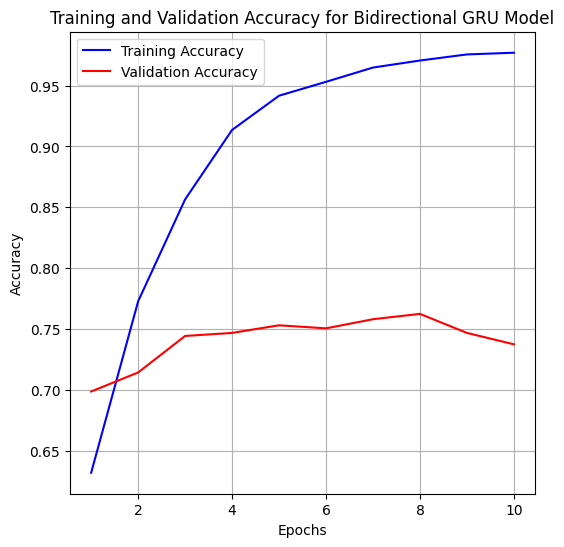

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1200
           1       0.69      0.80      0.74       800

    accuracy                           0.78      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.79      0.78      0.78      2000

Weighted F1 Score: 0.7774


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df['clean_content'] is already preprocessed
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_content'])
X = tokenizer.texts_to_sequences(df['clean_content'])
X = pad_sequences(X, maxlen=50)

# Labels
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Architecture
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=50),
    Bidirectional(GRU(64, return_sequences=True)),
    Bidirectional(GRU(32)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Predict and Calculate Accuracy
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")




import matplotlib.pyplot as plt

# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Bidirectional GRU Model')
plt.legend(loc='best')
plt.grid(True)

plt.show()




y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate Weighted F1 Score
f1_bi_gru = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1_bi_gru:.4f}")



# Improvement to Increase the Accuracy

**Introducing the Word Augmentation and Bag of Words**

In [ ]:
# Initialize the WordNet Augmenter
augmenter = WordNetAugmenter()

# Perform data augmentation by generating one augmented sentence per input
df_augmented = pd.DataFrame({
    'clean_content': df['clean_content'].apply(lambda x: augmenter.augment(x)[0] if len(augmenter.augment(x)) > 0 else x),
    'label': df['label']
})

# Combine original and augmented data
df_combined = pd.concat([df, df_augmented])

# Shuffle the dataset to ensure variety
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Split dataset
X_train_texts, X_test_texts, y_train, y_test = train_test_split(df_combined['clean_content'], df_combined['label'], test_size=0.2, random_state=42)

# TF-IDF (Unigram) Feature Extraction
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_texts)
X_test_tfidf = tfidf_vectorizer.transform(X_test_texts)

# BoW (Count Vectorizer)
bow_vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_bow = bow_vectorizer.fit_transform(X_train_texts)
X_test_bow = bow_vectorizer.transform(X_test_texts)

# Combine both feature sets (TF-IDF + BoW)
X_train_combined = np.hstack((X_train_tfidf.toarray(), X_train_bow.toarray()))
X_test_combined = np.hstack((X_test_tfidf.toarray(), X_test_bow.toarray()))

# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**MLP**

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6580 - loss: 0.6152 - val_accuracy: 0.8380 - val_loss: 0.3665
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9148 - loss: 0.2344 - val_accuracy: 0.8988 - val_loss: 0.2542
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9626 - loss: 0.1075 - val_accuracy: 0.9140 - val_loss: 0.2330
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9800 - loss: 0.0561 - val_accuracy: 0.9247 - val_loss: 0.2357
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9853 - loss: 0.0386 - val_accuracy: 0.9310 - val_loss: 0.2479
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9333 - loss: 0.2437
Test Accuracy: 93.10%


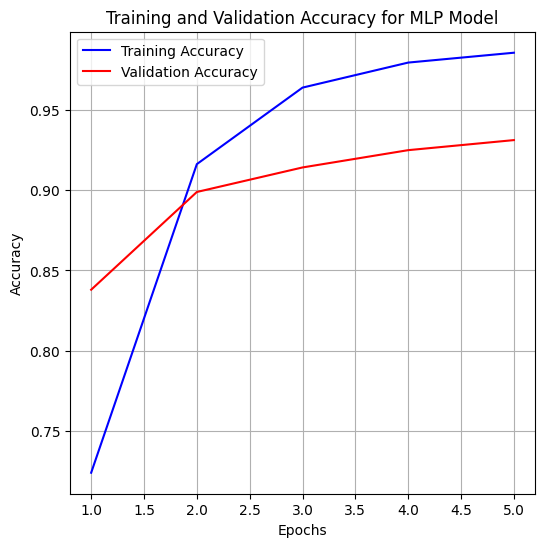

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2414
           1       0.91      0.92      0.91      1586

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

F1 Score Overall: 0.9311


Mounted at /content/drive


In [ ]:
mlp_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_combined.shape[1],)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(2, activation="softmax")
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

# Train the model
history = mlp_model.fit(X_train_combined, y_train_categorical,
                        epochs=5, batch_size=64,
                        validation_data=(X_test_combined, y_test_categorical),
                        verbose=1)



test_loss, test_accuracy = mlp_model.evaluate(X_test_combined, y_test_categorical, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)


plt.figure(figsize=(6, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for MLP Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()



y_pred_probs = mlp_model.predict(X_test_combined)

# Convert to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


f1_mlp_aug = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score Overall: {f1_mlp_aug:.4f}")

from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/model.h5')

**Random Forest**

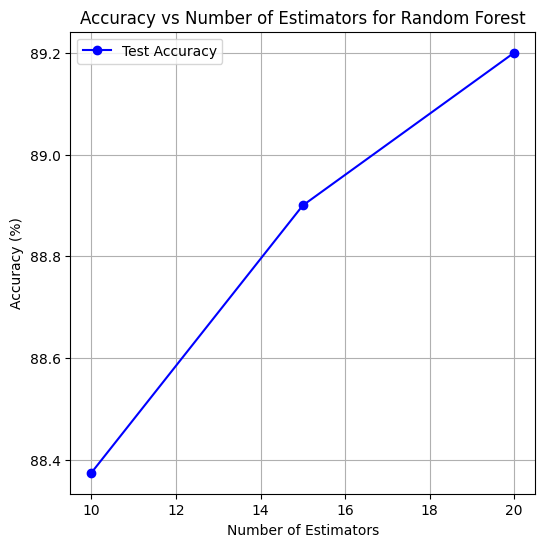

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2414
           1       0.86      0.86      0.86      1586

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

F1 Score: 0.8920


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(X_train_combined, y_train)

y_pred = rf_model.predict(X_test_combined)


# Evaluation Graph
# for different n_estimators
# as no epoch in rf so cant take that approach to get the graph
n_estimators = [10,15, 20]
accuracies = []
from sklearn.metrics import accuracy_score

for n in n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train_combined, y_train)
    y_pred = rf_model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy * 100)

# Plot the accuracy
plt.figure(figsize=(6, 6))
plt.plot(n_estimators, accuracies, marker='o', linestyle='-', color='blue', label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Number of Estimators for Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate F1 Score
f1_rf_aug = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1_rf_aug:.4f}")

# F1-Score Compare

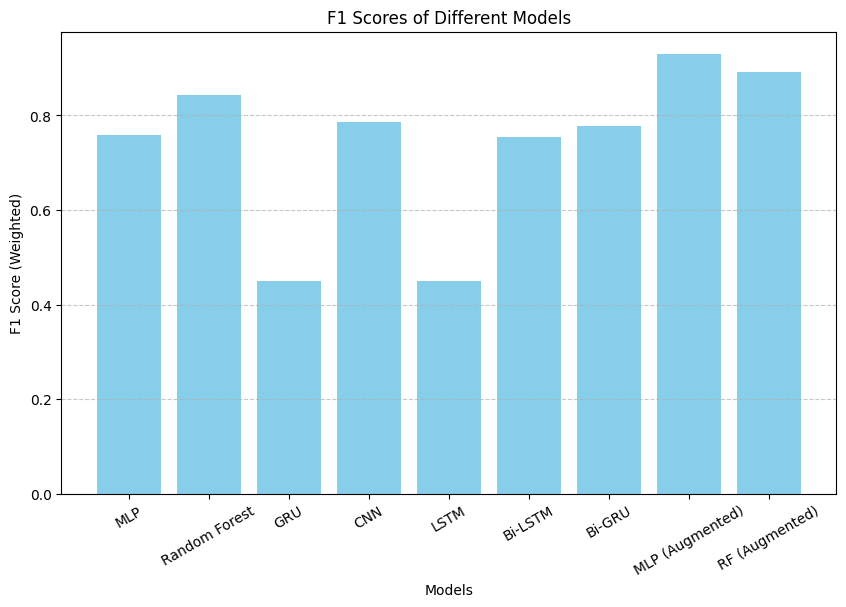

In [ ]:
f1_scores = {
    "MLP": f1_mlp,
    "Random Forest": f1_rf,
    "GRU": f1_gru,
    "CNN": f1_conv,
    "LSTM": f1_lstm,
    "Bi-LSTM": f1_bi_lstm,
    "Bi-GRU": f1_bi_gru,
    "MLP (Augmented)": f1_mlp_aug,
    "RF (Augmented)": f1_rf_aug,
}

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score (Weighted)')
plt.title('F1 Scores of Different Models')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()